# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
ruta=r"C:\Users\Rodenas\Downloads\Datos+Meteorológicos_Arg_2023.csv"

In [41]:
df=pd.read_csv(ruta)
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [47]:
# cambiar a tipo fecha a datetime
df["Fecha"]=pd.to_datetime(df["Fecha"],format="%d/%m/%Y")
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [49]:
lista_ciudades=[]
for c in df["Ciudad"]:
    if c not in lista_ciudades:
        lista_ciudades.append(c)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [52]:
dict_mes={
    1:"Enero",
    2:"Febrero",
    3:"Marzo",
    4:"Abril",
    5:"Mayo",
    6:"Junio",
    7:"Julio",
    8:"Agosto",
    9:"Septiembre",
    10:"Octubre",
    11:"Noviembre",
    12:"Diciembre"
}

In [82]:
def consultar_Temperatura():
    while True:
        print("\nCiudades disponible:",lista_ciudades)
        ciudad_elegida=input("Ingrese la ciudad:").title()
        mes_elegido=int(input("elija el mes , por ejemplo Enero=1:"))
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1,13):
            print("mes o ciudad no validos.Intentelo otra vez")
            continue
        #dataframe filtrado
        dataframe_mes_ciudad=df[(df["Ciudad"]==ciudad_elegida)&(df["Fecha"].dt.month==mes_elegido)]
        plt.figure(figsize=(10,8))
        plt.plot(dataframe_mes_ciudad["Fecha"],dataframe_mes_ciudad["Temperatura Maxima"],color="red",label="Temperatura Maxima")
        plt.plot(dataframe_mes_ciudad["Fecha"],dataframe_mes_ciudad["Temperatura Minima"],color="blue",label="Temperatura Minima")
        plt.title(f"La temperatura de la {ciudad_elegida} en el mes {mes_elegido}")
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
        #preguntar si quiere seguir consultando 
        repetir=input("desea seguir consultando:(si/no)")
        if repetir.lower()!="si":
            break
        


Ciudades disponible: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Ingrese la ciudad: Buenos Aires
elija el mes , por ejemplo Enero=1: 3


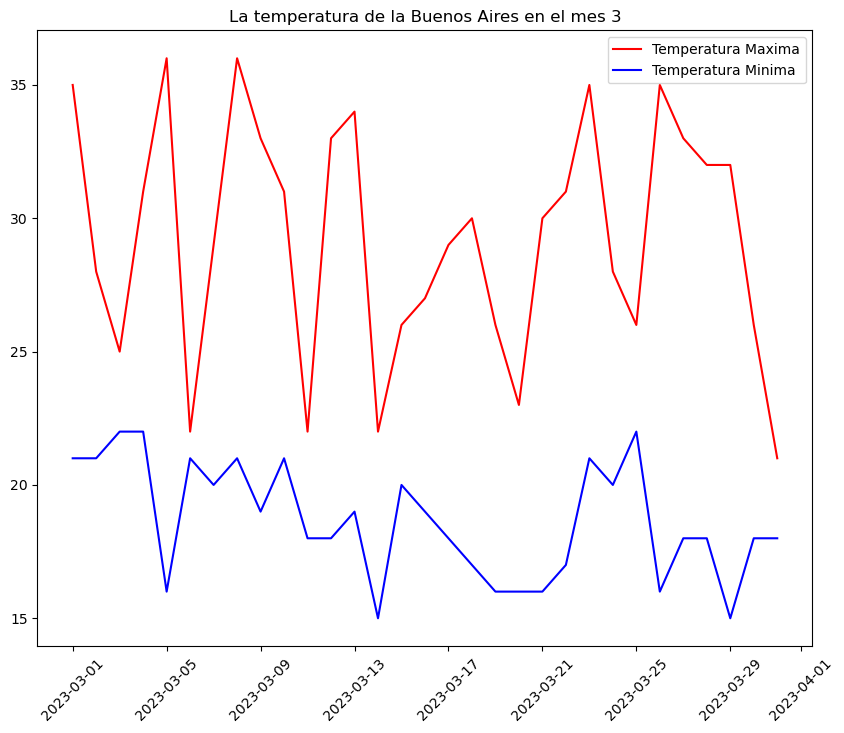

desea seguir consultando:(si/no) no 


In [84]:
consultar_Temperatura()